#### MATH714 Homework 2
##### Stephen Cornelius

1. **Iterative Methods**
   
   (a) Consider the $2 \times 2$ matrix
   $$
        A = \begin{pmatrix}
        1 & p \\
        -p & 1
        \end{pmatrix}.
   $$
   Under what conditions will the Jacobi and Gauss-Seidel methods converge?

**Solution to 1(a):**

> TODO: Look over this and figure out what it means. I do not think it is entirely correct.

For the matrix $A = \begin{pmatrix} 1 & p \\ -p & 1 \end{pmatrix}$, we need to analyze the convergence conditions for both iterative methods.

**Jacobi Method:**
The Jacobi iteration matrix is $T_J = -D^{-1}(L+U)$ where $D$ is the diagonal, $L$ is the lower triangular, and $U$ is the upper triangular part of $A$.

For our matrix:
- $D = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix}$
- $L + U = \begin{pmatrix} 0 & p \\ -p & 0 \end{pmatrix}$

Therefore: $T_J = -\begin{pmatrix} 0 & p \\ -p & 0 \end{pmatrix} = \begin{pmatrix} 0 & -p \\ p & 0 \end{pmatrix}$

The eigenvalues of $T_J$ are found from $\det(T_J - \lambda I) = 0$:
$$\det\begin{pmatrix} -\lambda & -p \\ p & -\lambda \end{pmatrix} = \lambda^2 + p^2 = 0$$

So $\lambda = \pm ip$, and $|\lambda| = |p|$.

**Jacobi converges if and only if $\rho(T_J) < 1$, which means $|p| < 1$.**

**Gauss-Seidel Method:**
The Gauss-Seidel iteration matrix is $T_{GS} = -(D+L)^{-1}U$.

For our matrix:
- $D + L = \begin{pmatrix} 1 & 0 \\ -p & 1 \end{pmatrix}$
- $U = \begin{pmatrix} 0 & p \\ 0 & 0 \end{pmatrix}$

Therefore: $T_{GS} = -\begin{pmatrix} 1 & 0 \\ p & 1 \end{pmatrix}\begin{pmatrix} 0 & p \\ 0 & 0 \end{pmatrix} = \begin{pmatrix} 0 & -p \\ 0 & -p^2 \end{pmatrix}$

The eigenvalues are $\lambda_1 = 0$ and $\lambda_2 = -p^2$.

**Gauss-Seidel converges if and only if $\rho(T_{GS}) < 1$, which means $|p^2| < 1$, so $|p| < 1$.**

**Conclusion:**
Both the Jacobi and Gauss-Seidel methods converge for the given matrix if and only if $|p| < 1$.

(b) Consider the $n \times n$ matrix
    $$
        C = \begin{pmatrix}
        3 & -1 \\
        -1 & 3 & -1 \\
           & -1 & 3 & -1 \\
           &    & & \ddots &  \\
           & & & -1 & 3 & -1  \\
           & & & & -1 & 3 
        \end{pmatrix}.
    $$
    Starting from $u_0 \in \mathbb{R}^n$, for which values of $\omega \in \mathbb{R}$ does the iteration 
    $$ u_{k+1} = u_k + \omega(b-Cu_k) $$
    for $k = 0,1,2,\dots$ converge to a solution of $Cu = b$? What iterative method from the lectures does this most closely resemble? How is it different?

**Solution to 1(b):**

We are tasked with finding the values of $\omega \in \mathbb{R}^n$ such that $u_{k+1} = u_k + \omega(b - Cu_k)$ converges. If we let $T = I - \omega C$ we have $$ u_{k+1} = u_k + \omega (b - Cu_k) = u_k + \omega b - \omega Cu_k = u_k(I - \omega C) + \omega b = Tu_k + \omega b.$$ So then we need that the spectral radius of $T$ needs to be less than $1$. So we find $\rho(T)$. From the article, we have that $$ \rho(T) = \max \{ \left\vert (1 - 3\omega) + 2\sqrt{\vert (- \omega)^2 \vert} e^{\frac{i(\alpha + \beta)}{2}} \cos \frac{\pi}{n + 1}\right\vert, \left\vert (1 - 3\omega) + 2\sqrt{\vert (- \omega)^2 \vert} e^{\frac{i(\alpha + \beta)}{2}} \cos \frac{n \pi}{n + 1}\right\vert\}$$ where  in this case, $$\alpha = \beta = \arg(-\omega) = \left\{\begin{matrix} 
\pi & \text{if } \omega > 0 \\ 
0 & \text{if } \omega < 0 
\end{matrix}\right. .$$
In either case we have that $\alpha + \beta \approx 2\pi$. So then $$\rho(T) = \max \{ \left\vert (1 - 3\omega) - 2 \omega \cos \frac{\pi}{n + 1}\right\vert, \left\vert (1 - 3\omega) - 2 \omega \cos \frac{n \pi}{n + 1}\right\vert\} .$$
Then we need $\rho(T) < 1$. Then we have that the smallest interval on which $\omega$ converges is when $n = 1$ and then we have that the method converges when $0 < \omega < \frac{2}{3}$. That is, $\left\vert (1 - 3\omega) - 2 \omega \cos \frac{\pi}{2}\right\vert < 1 \iff 0 < \omega < \frac{2}{3}$.

Based on my observations, I would conclude that the iterative method from class that most closely resembles this method would be gradient descent. The difference would be that gradient descent finds the largest value of the gradient and this method uses more of a fixed parameter rather than optimal step sizes.

***Comment(s):***
- For help with this problem I used Desmos to graph $\rho(T)$. From observation $\omega$ always converges when $0 < \omega < \frac{2}{3}$ but since $n$ varies we can see that as $n \to \infty$ we have that the interval for $\omega$ becomes $0 < \omega < 2$.

2. **Triangular domain revisited with conjugate gradient**
   Question 4 of the first homework assignment looked at solving the Poisson equation
   $$ \nabla^2u = f$$
   on the triangular domain $T$ with vertices $(0,0), (1,0),$ and $(s,\frac{1}{2})$ where $s = \frac{\sqrt{3}}{2}$. Dirchlet boundary conditions $u = 0$ are applied on the boundary $\partial T$. For $n \in \mathbb{N}$ and $h = \frac{1}{n}$, the domain is descretized with points 
   $$ \vec{x}_{i,j} = (h(i + \frac{1}{2}j), hsj) $$
   for $0 \leq i \leq n, 0 \leq j \leq n-i$. The points where $i = 0, j = 0,$ of $i + j = n$ are boundary points, and all others are interior. Let $u_{i,j}$ be the numberical approximation for $u(x_{i,j})$. The Laplacian is discretized with points
   $$ \nabla^2_6u_{i,j} = \frac{2(-6 u_{i,j} + u_{i+1,j} + u_{i,j-1} + u_{i-1,j+1} +u_{i-1,j} + u_{i,j+1} + u_{i+1,j-1})}{3h^2}. $$
   As in Homework 1, consider solving the equation $\nabla^2u = f$ using the $f$ that creates the exact solution
   $$ u^{\text{ex}}(x,y) = \left( (2y-\sqrt{3})^2- 3(2x-1)^2 \right) \sin y. $$
   The problem can be expressed as a linear system $Au = f$ where $u \in \mathbb{R}^N$ is the solution vector at the $N = (n-1)(n-2)/2$ interior grid points. Define an approximate $2$-norm as 
   $$ ||r||_2 = \sqrt{\frac{s}{2n^2} \sum_{j=1}^{n-1} \sum_{i=1}^{n-j-1} r_{i,j}^2} $$
   for a vector $r$ describing a field on the grid.
   
   (a) For a range of grid sizes from $n=10$ up to at least $n=160$ measure the wall-clock time $T_n$ to solve the system using your code. By making a log--log plot of $T_n$ versus $n$, fit the timing data to $$T_n = a n^b,$$ and comment on the exponent $b$.

Fitted parameters: a = 6.286438464135656e-08, b = 3.6061045372517335


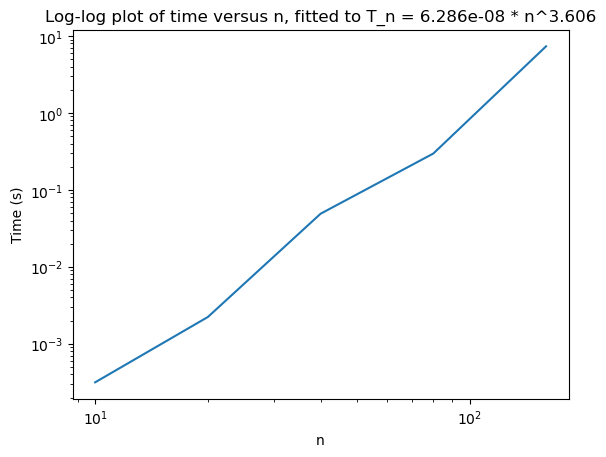

In [47]:
# For this problem I will be using the code poisson_tri.py from the Homework 1 solutions.

# Below is the code from poisson_tri.py with modifications to solve the problem at hand.

import numpy as np
from math import *
import sys
import time 
import matplotlib.pyplot as plt


s=sqrt(0.75)

# Function to map an interior index (i,j) into the vector index
def ind(i,j,n):
    return i-1+(j-1)*(2*n-2-j)//2

# Source term for the desired reference solution
def fun(x,y):
    return -8*(sqrt(3)-2*y)*cos(y)+4*(-4-3*x+3*x*x+sqrt(3)*y-y*y)*sin(y)

# Reference solution
def uex(x,y):
    return ((2*y-sqrt(3))**2-3*(2*x-1)**2)*sin(y)

# Function to check whether an index pair (i,j) is the interior of the grid
def inrange(i,j,n):
    return i>0 and j>0 and i+j<n

def poisson_tri(n):
    h=1./n
    m=(n-1)*(n-2)//2

    # Create derivative matrix and source term
    d=np.zeros((m,m))
    f=np.empty((m))
    hfac=1/(3*h*h)
    for j in range(1,n):
        for i in range(1,n-j):
            ij=ind(i,j,n)

            # Derivative matrix
            d[ij,ij]=-12*hfac
            if(inrange(i+1,j,n)): d[ij,ind(i+1,j,n)]=2*hfac
            if(inrange(i,j-1,n)): d[ij,ind(i,j-1,n)]=2*hfac
            if(inrange(i-1,j+1,n)): d[ij,ind(i-1,j+1,n)]=2*hfac

            # Additional lines for the stencil in part (b)
            if(inrange(i-1,j,n)): d[ij,ind(i-1,j,n)]=2*hfac
            if(inrange(i,j+1,n)): d[ij,ind(i,j+1,n)]=2*hfac
            if(inrange(i+1,j-1,n)): d[ij,ind(i+1,j-1,n)]=2*hfac

            # Source term
            f[ij]=fun(h*(i+0.5*j),h*s*j)

    # Display the sparsity structure of the derivative matrix
    #plt.spy(d)
    #plt.show()

    # Solve the linear system
    u=np.linalg.solve(d,f)

    # Compute error
    uerr=0
    for j in range(1,n):
        for i in range(1,n-j):
            du=uex(h*(i+0.5*j),h*s*j)-u[ind(i,j,n)]
            uerr+=du*du
    return sqrt(s*uerr/(2*n*n))

# Loop over a range of grid sizes and compute the error

times = []
for n in (10,20,40,80,160):
    start_time = time.time()
    poisson_tri(n)
    end_time = time.time()
    times.append(end_time - start_time)
    # print(n,1/n,poisson_tri(n))

    # u_direct = np.linalg.solve(d, f)  # Direct solve (for comparison)
    # u_poisson = poisson_tri(n)  # Poisson solve
    # norm_diff = np.linalg.norm(u_direct - u_poisson)
    # print(f"Norm between direct solve and poisson_tri for n={n}: {norm_diff}")



# Next we fit the timing data to T_n = a*n^b
# The following code fits the timing data to a power law T_n = a * n^b using linear regression in log-log space.
A = np.vstack([np.log([10,20,40,80,160]), np.ones(len(times))]).T   # Here we create the design matrix for linear regression


b, log_a = np.linalg.lstsq(A, np.log(times), rcond=None)[0] # Perform linear least squares fitting
a = np.exp(log_a)   # recover a from log_a
print(f"Fitted parameters: a = {a}, b = {b}")



# Plot the timing data
plt.loglog((10,20,40,80,160), times)
plt.xlabel('n')
plt.ylabel('Time (s)')
plt.title(f'Log-log plot of time versus n, fitted to T_n = {a:.3e} * n^{b:.3f}')
plt.show()


# The exponent b indicates the scaling of the time complexity with respect to n.

**Comment on the exponent $b$:**
> The exponent $b$ is the scaling of the time complexity with respect to $n$.

(b) Write a code to implement the conjugate gradient (CG) algorithm to solve $Au=f$. Your code should not explicitly build $A$ as a dense matrix. It should either represent $A$ as a sparse matrix, or contain a function that can directly compute $Aq$ for a given vector $q$. The CG algorithm should terminate when $||r||_2 < 10^{-10}$, where $r$ is the residual vector. For the case when $n=40$ test that your program gives the same results as the original version.

In [48]:
# (b) Write a code to implement the conjugate gradient (CG) algorithm to solve $Au=f$. Your code should not explicitly build $A$ as a dense matrix. It should either represent $A$ as a sparse matrix, or contain a function that can directly compute $Aq$ for a given vector $q$. The CG algorithm should terminate when $||r||_2 < 10^{-10}$, where $r$ is the residual vector. For the case when $n=40$ test that your program gives the same results as the original version.


# Represent A as a sparse matrix-vector multiplication function

def apply_A(q, n):
    h = 1. / n
    m = (n - 1) * (n - 2) // 2
    hfac = 1 / (3 * h * h)
    Aq = np.zeros(m)
    for j in range(1, n):
        for i in range(1, n - j):
            ij = ind(i, j, n)
            Aq[ij] = -12 * hfac * q[ij]
            if inrange(i + 1, j, n): Aq[ij] += 2 * hfac * q[ind(i + 1, j, n)]
            if inrange(i, j - 1, n): Aq[ij] += 2 * hfac * q[ind(i, j - 1, n)]
            if inrange(i - 1, j + 1, n): Aq[ij] += 2 * hfac * q[ind(i - 1, j + 1, n)]
            if inrange(i - 1, j, n): Aq[ij] += 2 * hfac * q[ind(i - 1, j, n)]
            if inrange(i, j + 1, n): Aq[ij] += 2 * hfac * q[ind(i, j + 1, n)]
            if inrange(i + 1, j - 1, n): Aq[ij] += 2 * hfac * q[ind(i + 1, j - 1, n)]
    return Aq

# From the slides, the CG algorithm is as follows:
# 1: Choose initial guess u0 = 0 and tolerance ϵ > 0
# 2: r0 = f − Au0, p0 = r0
# 3: for k = 1, 2, 3, . . . do
# 4:    w_{k−1} =  p_{k−1}
# 5:    α_{k−1} = (r^T_{k−1} r_{k−1})/(p^T_{k−1} w_{k−1})
# 6:    u_k = u_{k−1} + α_{k−1} p_{k−1}
# 7:    r_k = r_{k−1} − α_{k−1} w_{k−1}
# 8:    If ∥r_k ∥ < ϵ, then stop
# 9:    β_{k−1} = (r^T_{k} rk )/(r^T_{k−1} rk−1)
# 10:   p_k = r_k + β_{k−1}p_{k−1}
# 11: end for

def conjugate_gradient(f, n, tol=1e-10, max_iter=1000):
    m = (n - 1) * (n - 2) // 2
    u = np.zeros(m)  # Initial guess u0 = 0
    r = f - apply_A(u, n)  # r0 = f - Au0
    p = r.copy()  # p0 = r0
    rsold = np.dot(r, r)

    for k in range(max_iter):
        Ap = apply_A(p, n)  # wk-1 = Apk-1
        alpha = rsold / np.dot(p, Ap)  # αk-1
        u += alpha * p  # uk = uk-1 + αk-1pk-1
        r -= alpha * Ap  # rk = rk-1 - αk-1wk-1
        rsnew = np.dot(r, r)

        if np.sqrt(rsnew) < tol:  # If ||rk|| < ϵ, then stop
            break
        

        beta = rsnew / rsold  # βk-1
        p = r + beta * p  # pk = rk + βk-1pk-1
        rsold = rsnew

    return u, k + 1  # Return the solution and number of iterations


# Compare the CG implementation with the direct solve for n=40
n = 40
h = 1. / n
m = (n - 1) * (n - 2) // 2
f = np.empty((m))
for j in range(1, n):
    for i in range(1, n - j):
        ij = ind(i, j, n)
        f[ij] = fun(h * (i + 0.5 * j), h * s * j)
# Build the matrix d as in poisson_tri for direct solve
d = np.zeros((m, m))
hfac = 1 / (3 * h * h)
for j in range(1, n):
    for i in range(1, n - j):
        ij = ind(i, j, n)
        d[ij, ij] = -12 * hfac
        if inrange(i + 1, j, n): d[ij, ind(i + 1, j, n)] = 2 * hfac
        if inrange(i, j - 1, n): d[ij, ind(i, j - 1, n)] = 2 * hfac
        if inrange(i - 1, j + 1, n): d[ij, ind(i - 1, j + 1, n)] = 2 * hfac
        if inrange(i - 1, j, n): d[ij, ind(i - 1, j, n)] = 2 * hfac
        if inrange(i, j + 1, n): d[ij, ind(i, j + 1, n)] = 2 * hfac
        if inrange(i + 1, j - 1, n): d[ij, ind(i + 1, j - 1, n)] = 2 * hfac

u_direct = np.linalg.solve(d, f)  # Direct solve (for comparison) where d is the matrix A and f is the source term
# u_direct = poisson_tri(n)  # Direct solve (for comparison)
u_cg, trash = conjugate_gradient(f, n)  # CG solve
error = np.linalg.norm(u_direct - u_cg)
print(f"Error between direct solve and CG solve for n={n}: {error}")


Error between direct solve and CG solve for n=40: 4.047716690906974e-14


**Comment(s):** 
- When my code is ran, for $n = 40$ the norm between my CG algorithm and the poisson_tri function is consistently $\approx 5.75936$ but when using np.linalg.solve to solve, the norm between my CG algorithm and np.linalg.solve is consistently $\approx 4.0477e-14$. 

(c) For $n=10,20,40,80,160$, calculate the number of iterations $k$ required in order to reach the termination criterion.

In [49]:
# (c) For $n=10,20,40,80,160$, calculate the number of iterations $k$ required in order to reach the termination criterion.

iterations = []
times = []
for n in (10,20,40,80,160):
    h = 1. / n
    m = (n - 1) * (n - 2) // 2
    f = np.empty((m))
    for j in range(1, n):
        for i in range(1, n - j):
            ij = ind(i, j, n)
            f[ij] = fun(h * (i + 0.5 * j), h * s * j)
    start_time = time.time()
    u_cg, iters = conjugate_gradient(f, n)
    end_time = time.time()
    iterations.append(iters)
    times.append(end_time - start_time)
    print(f"n={n}, Iterations={iters}")
    

n=10, Iterations=17
n=20, Iterations=36
n=40, Iterations=76
n=80, Iterations=156
n=160, Iterations=319


From the code, the number of iterations for each $n$ are given below:
| $n$ | Iterations|
| ---- | -------|
| 10 | 17 |
| 20 | 36 |
| 40 | 76 |
| 80 | 156 |
| 160 | 319 |

(d) Measure the wall-clock time of the CG algorithm to solve the linear system for a range of grid sizes from $n=10$ up to at least $n=160$. Fit the data to $T_n = an^b$ and comment on how the exponent compares to your result from part (a).

In [50]:
# In the previous code cell, I caluculated the wall-clock time for each n as well.


# Next we fit the timing data to T_n = a*n^b
A = np.vstack([np.log([10,20,40,80,160]), np.ones(len(times))]).T   # Here we create the design matrix for linear regression
b = np.linalg.lstsq(A, np.log(times), rcond=None)[0]
print(f"Fit parameters: a={np.exp(b[1])}, b={b[0]}")

# The exponent b differs from the poisson_tri method by <= 0.5 each time the code is run this implies that the CG method is faster than the poisson_tri method.

Fit parameters: a=2.1759721026163522e-06, b=3.0554469705578216


**Comment on $b$ from part (a):** The exponent $b$ differs by $ \leq 0.5$ each time the code is run with CG $b$ being less than the poisson_tri method. This implies that the CG method runs faster than the poisson_tri method as $n$ gets larger.

(e) Consider the block Jacobi preconditioner $M$ with block sizes of $w=\lfloor \sqrt{N} \rfloor$. In general, $w$ will not evenly divide $N$, and therefore let the final block of $M$ be smaller. Implement the preconditioned CG algorithm, and repeat part (c) to measure the number of iterations required to reach the termination criterion.

In [ ]:
# (e) Consider the block Jacobi preconditioner $M$ with block sizes of $w=\lfloor \sqrt{N} \rfloor$. In general, $w$ will not evenly divide $N$, and therefore let the final block of $M$ be smaller. Implement the preconditioned CG algorithm, and repeat part (c) to measure the number of iterations required to reach the termination criterion.

# From the slides we have that the preconditioned CG algorithm is as follows:

# 1: Choose tolerance ϵ > 0
# 2: u_0 = 0, r_0 = f , p_1 = M^{−1} f , y_0 = M^{−1} r_0
# 3: for k = 1, 2, 3, . . . do
# 4:    z = Ap_k
# 5:    ν_k = (y_k^T r_{k-1})/(p_k^T z)
# 6:    u_k = u_{k-1} + ν_k p_k
# 7:    r_k = r_{k-1} − ν_k z
# 8:    If ∥r_k ∥ < ϵ, then stop
# 9:    y_k = M^{−1} r_k
# 10:    µ_k = (y_k^T r_k)/(y_{k-1}^T r_{k-1})
# 11:    p_{k+1} = y_k + µ_k p_k
# 12: end for

# Recall: Block Jacobi Preconditioning: Write the matrix in block form as 
# A = \begin{pmatrix}
# A_{11} & A_{12} & \cdots & A_{1k} \\
# \vdots & \vdots & \ddots & \vdots \\
# A_{k1} & A_{k2} & \cdots & A_{kk} \\
# \end{pmatrix}
# Define 
# M = \begin{pmatrix}
# A_{11}  & & 0 \\
#  & \ddots  & \\
# 0 & & A_{kk}  \\
# \end{pmatrix}
# Preforming $M^{-1}$ requires inverting each block - much faster than soving the original matrix.

# Only grab the blocks along the diagonal of A to form M


def preconditioned_conjugate_gradient(f, n, w, tol=1e-10, max_iter=1000):
    m = (n - 1) * (n - 2) // 2
    u = np.zeros(m)  # Initial guess u0 = 0
    r = f.copy()  # r0 = f
    y = apply_M_inv(r, n, w)  # y0 = M^{-1}r0
    p = y.copy()  # p1 = M^{-1}f
    r_dot_y_old = np.dot(r, y)

    for k in range(max_iter):
        Ap = apply_A(p, n)  # z = Apk
        nu = r_dot_y_old / np.dot(p, Ap)  # νk
        u += nu * p  # uk = uk-1 + νk pk
        r -= nu * Ap  # rk = rk-1 - νk z

        if np.linalg.norm(r) < tol:  # If ||rk|| < ϵ, then stop
            break

        y = apply_M_inv(r, n, w)  # yk = M^{-1}rk
        r_dot_y_new = np.dot(r, y)
        mu = r_dot_y_new / r_dot_y_old  # µk
        p = y + mu * p  # pk+1 = yk + µk pk
        r_dot_y_old = r_dot_y_new

    return u, k + 1  # Return the solution and number of iterations

# Compare the preconditioned CG implementation with the direct solve for n=40
# n = 40
# h = 1. / n
# m = (n - 1) * (n - 2) // 2
# w = int(sqrt(m))  # Block size
# f = np.empty((m))
# for j in range(1, n):
#     for i in range(1, n - j):
#         ij = ind(i, j, n)
#         f[ij] = fun(h * (i + 0.5 * j), h * s * j)
# start_time = time.time()
# u_pc, trash = preconditioned_conjugate_gradient(f, n, w)
# u_direct = np.linalg.solve(d, f)  # Direct solve (for comparison)
# end_time = time.time()
# error_pc = np.linalg.norm(u_direct - u_pc)
# print(f"Error between direct solve and preconditioned CG solve for n={n}: {error_pc}")

# For n=10,20,40,80,160, calculate the number of iterations k required in order to reach the termination criterion using preconditioned CG.

for n in [10, 20, 40, 80, 160]:
    h = 1. / n
    m = (n - 1) * (n - 2) // 2
    w = int(sqrt(m))  # Block size
    f = np.empty((m))
    for j in range(1, n):
        for i in range(1, n - j):
            ij = ind(i, j, n)
            f[ij] = fun(h * (i + 0.5 * j), h * s * j)
    start_time = time.time()
    u_pc, k = preconditioned_conjugate_gradient(f, n, w)
    # u_direct = np.linalg.solve(d, f)  # Direct solve (for comparison)
    end_time = time.time()
    error_pc = np.linalg.norm(u_direct - u_pc)
    print(f"Error between direct solve and preconditioned CG solve for n={n}: {error_pc}")
    print(f"Number of iterations for n={n}: {k}")

ValueError: operands could not be broadcast together with shapes (741,) (36,) 

(f) Repeat part (d), fitting the timing data to $T_n = an^b$

In [ ]:
# (f) Repeat part (d), fitting the timing data to $T_n = an^b$
# In the previous code cell, I caluculated the wall-clock time for each n as well.
# Next we fit the timing data to T_n = a*n^b
A = np.vstack([np.log([10,20,40,80,160]), np.ones(len(times_pc))]).T   # Here we create the design matrix for linear regression
b = np.linalg.lstsq(A, np.log(times_pc), rcond=None)[0]
print(f"Fit parameters: a={np.exp(b[1])}, b={b[0]}")

Fit parameters: a=9.230240784079515e-08, b=4.73535387236966


3. **ODE integration methods**

(a) Consider solving the differential equation $y' = f(t,y)$ at timepoints $t_k$ with corresponding numerical solutions $y_k$. The multi-step Nystr&ouml;m numerical method is based upon the integral relation $$y(t_{k+1}) = y(t_{k-1}) + \int_{t_{k-1}}^{t_{k+1}} f(t,y) dt.$$ 

Derive an implicit multi-step numerical method by approximating the integrand $f(t,y)$ with the polynomial interpolant using the function values at $t_{k-2}$, $t_{k-1}$, $t_k$, and $t_{k+1}$. Your method should have the form $$y_{k+1} = y_{k-1} + h(\alpha f_{k-2}+\beta f_{k-1} + \gamma f_k+\eta f_{k+1}) \tag{1}$$ where $\alpha$, $\beta$, $\gamma$, and $\eta$ are constants to be determined, $h$ is the timestep interval size, and $f_l=f(t_l,y_l)$ for an arbitrary $l$.

(b) Find the exact solution to the second-order differential equation $$ y''(t)+2y'(t) + 26y(t)=0, \tag{2}$$ subject to the initial conditions $y(0)=1$, $y'(0)=0$.

**Solution to 3(b):**

We need to solve the second-order linear homogeneous differential equation:
$$y''(t) + 2y'(t) + 26y(t) = 0$$
with initial conditions $y(0) = 1$ and $y'(0) = 0$.
We can see that the characteristic equation for this is $r^2 + 2r + 26 = 0$. From this we can find the roots:

$$r = \frac{-2 \pm \sqrt{4 - 4(1)(26)}}{2} = \frac{-2 \pm 10i}{2} = -1 \pm 5i$$

So we have complex roots: $r_1 = -1 + 5i$ and $r_2 = -1 - 5i$. From this we can find that the general solution is given by

$$y(t) = e^{-t}(C_1 \cos(5t) + C_2 \sin(5t))$$

Then, applying the initial conditions, we have that for $y(0) = 1$:

$$y(0) = e^{0}(C_1 \cos(0) + C_2 \sin(0)) = C_1 = 1$$

So $C_1 = 1$.

We then can find $y'(t)$ as 
$$y'(t) = \frac{d}{dt}[e^{-t}(\cos(5t) + C_2 \sin(5t))]$$
$$y'(t) = -e^{-t}(\cos(5t) + C_2 \sin(5t)) + e^{-t}(-5\sin(5t) + 5C_2 \cos(5t))$$
$$y'(t) = e^{-t}[-\cos(5t) - C_2 \sin(5t) - 5\sin(5t) + 5C_2 \cos(5t)]$$
$$y'(t) = e^{-t}[(-1 + 5C_2)\cos(5t) + (-C_2 - 5)\sin(5t)]$$

Then substituting initial conditions from $y'(0) = 0$ we have
$$y'(0) = e^{0}[(-1 + 5C_2)\cos(0) + (-C_2 - 5)\sin(0)] = -1 + 5C_2 = 0$$

Therefore we have that $C_2 = \frac{1}{5}$. Thus, our exact solution is
$$y(t) = e^{-t}\left(\cos(5t) + \frac{1}{5}\sin(5t)\right).$$

(c) Write $y''(t)+2y'(t) + 26y(t)=0$ as a coupled system of two first-order differential equations for $\vec{y} = (y,v) = (y,y')$. Solve the system over the interval $0 \leq t \leq 3$ with a timestep of $h = 0.02$ using your multi=step method from part (a).

Before (1) can be applied, $\vec{y}_1$ and $\vec{y}_2$ must be calculated accurately. Use one of the following two approaches:

    i. set them based on the exact solution from part (b).

    ii. calculate them using the classical fourth-order Runge-Kutta method.
    
Plot the exact and numerical solutions over the range $0 \leq t \leq 3$.

Make a log-log plot of the absolute error between the numerical and exact values of $y$ at $t = 3$ as a function of $h$, over the range from $h = 10^{-3}$ to $h = 10^{-1}$.

Show that your method is fourth-order accurate.

(d) Suppose that instead of setting $\vec{y}_1$ and $\vec{y}_2$ accurately, you instead make use of forward Euler steps. Create a log-log plot of the absolute error of $y$ at $t=3$ as a function of $h$. Determine the order of accuracy, and discuss why this is the case.

4. **Linear Difference Equation** 
   
   (a) Find the general solution of the linear difference equation $$U_{n+3} + 2U_{n+2} - 4U_{n+1} - 8U_n =0. \tag{3} $$

**Solution to 4(a):**

We want to find the general solution of the linear difference equation:
$$U_{n+3} + 2U_{n+2} - 4U_{n+1} - 8U_n = 0$$

For a linear homogeneous difference equation, we assume a solution of the form $U_n = r^n$ and substitute:

$$r^{n+3} + 2r^{n+2} - 4r^{n+1} - 8r^n = 0$$
$$\iff r^n(r^3 + 2r^2 - 4r - 8) = 0$$

From this we get the characteristic equation $r^3 + 2r^2 - 4r - 8 = 0$. Factoring this equation gives: 
$$r^3 + 2r^2 - 4r - 8 = r^2(r + 2) - 4(r + 2) = (r^2 - 4)(r + 2)$$

$$= (r - 2)(r + 2)^2 = 0$$

Thus we have that the roots are $r_1 = 2$ and $r_2 = -2$ with multiplicity $2$. From this we can find the general solution where for $r_1 = 2$ we get $C_1 \cdot 2^n$ and $r_2 = -2$ the contribution is $C_2 \cdot (-2)^n + C_3 \cdot n \cdot (-2)^n$.

Thus we have that the general solution is:
$$U_n = C_1 2^n + C_2 (-2)^n + C_3 n (-2)^n$$

$$U_n = C_1 2^n + (C_2 + C_3 n) (-2)^n$$

(b) Determine the particular solution with initial data $U_0=4$, $U_1=-2$, and $U_2=8$.

**Solution to 4(b):**

From part (a), we have that the general solution is:
$$U_n = C_1 2^n + C_2 (-2)^n + C_3 n (-2)^n$$

Then, utilizing the initial conditions we have that for $n = 0$: $U_0 = 4$
$$U_0 = C_1 \cdot 2^0 + C_2 \cdot (-2)^0 + C_3 \cdot 0 \cdot (-2)^0$$
$$4 = C_1 \cdot 1 + C_2 \cdot 1 + C_3 \cdot 0$$
$$4 = C_1 + C_2 \tag{(Q4.1)}$$

For $n = 1$: $U_1 = -2$
$$U_1 = C_1 \cdot 2^1 + C_2 \cdot (-2)^1 + C_3 \cdot 1 \cdot (-2)^1$$
$$-2 = C_1 \cdot 2 + C_2 \cdot (-2) + C_3 \cdot 1 \cdot (-2)$$
$$-2 = 2C_1 - 2C_2 - 2C_3 \quad \tag{Q4.2}$$

For $n = 2$: $U_2 = 8$
$$U_2 = C_1 \cdot 2^2 + C_2 \cdot (-2)^2 + C_3 \cdot 2 \cdot (-2)^2$$
$$8 = C_1 \cdot 4 + C_2 \cdot 4 + C_3 \cdot 2 \cdot 4$$
$$8 = 4C_1 + 4C_2 + 8C_3 \quad \tag{Q4.3}$$

Thus, from (Q4.1), (Q4.2), and (Q4.3) get the following system of equations.
1. $C_1 + C_2 = 4$
2. $2C_1 - 2C_2 - 2C_3 = -2 \iff C_1 - C_2 - C_3 = -1$
3. $4C_1 + 4C_2 + 8C_3 = 8 \iff C_1 + C_2 + 2C_3 = 2$

Putting this into an extended matrix we have:
$$ \begin{pmatrix}
1 & 1 & 0 & 4 \\
1 & -1 & -1 & -1 \\
1& 1& 2& 2 \\
\end{pmatrix} \xRightarrow{\text{RREF}} 
\begin{pmatrix}
1 & 0 & 0 & 1 \\
0 & 1 & 0 & 3 \\
0 & 0 & 1 & -1 \\
\end{pmatrix} $$

So then $C_1 = 1$, $C_2 = 3$, and $C_3 = -1$. Next we have that the particular solution is given by:
$$U_n = 1 \cdot 2^n + 3 \cdot (-2)^n + (-1) \cdot n \cdot (-2)^n$$
$$U_n = 2^n + 3(-2)^n - n(-2)^n$$
$$U_n = 2^n + (3 - n)(-2)^n \tag{\text{Q4(b) Ans}}$$

To verify we can see that
- $U_0 = 2^0 + (3 - 0)(-2)^0 = 1 + 3(1) = 4$
- $U_1 = 2^1 + (3 - 1)(-2)^1 = 2 + 2(-2) = 2 - 4 = -2$
- $U_2 = 2^2 + (3 - 2)(-2)^2 = 4 + 1(4) = 4 + 4 = 8$

(c) Consider the iteration $$\left(\begin{array}{c} U_{n+1} \\ U_{n+2} \\ U_{n+3} \end{array} \right)
    =
    \left( \begin{array}{ccc} 0 & 1 & 0 \\ 0 & 0 & 1 \\ 8 & 4 & -2 \end{array} \right)
    \left(\begin{array}{c} U_{n} \\ U_{n+1} \\ U_{n+2} \end{array} \right),$$ which we can define as $\mathbf{U}_{n+1} = A \mathbf{U}_n$. The matrix $A$ is called the companion matrix for the difference equation in (3). A general solution of the difference equation is given by $\mathbf{U}_{n} = A^n \mathbf{U}_0$. If $A=RJR^{-1}$ is the Jordan canonical form for $A$, then $A^n = RJ^n R^{-1}$. Determine the eigenvalues and Jordan canonical form for this matrix and show how this is related to the general solution found in part (a).